<a href="https://colab.research.google.com/github/Anpsujwal/stock_market_prediction/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data loading preprocessing




In [ ]:
import pandas as pd

# Load the dataset
df=pd.read_csv("/content/infolimpioavanzadoTarget.csv")

# Display the first few rows
print(df.head())

# Check the data types and missing values
print(df.info())

# Convert date column to datetime format (if necessary)
df['date'] = pd.to_datetime(df['date'])

# Check for missing values and handle them
print(df.isnull().sum())
# You can handle missing values as necessary, e.g., dropping rows or filling with mean/median
df=df.dropna()


         date       open       high        low      close   adjclose  volume  \
0  2022-01-03  17.799999  18.219000  17.500000  17.760000  17.760000  106600   
1  2022-01-04  17.700001  18.309999  17.620001  17.660000  17.660000  128700   
2  2022-01-05  17.580000  17.799999  16.910000  16.950001  16.950001  103100   
3  2022-01-06  16.650000  16.879999  16.139999  16.170000  16.170000  173600   
4  2022-01-07  16.219999  16.290001  15.630000  15.710000  15.710000  137800   

  ticker  RSIadjclose15  RSIvolume15  ...  high-15  K-15  D-15  \
0   ASLE            NaN          NaN  ...      NaN   NaN   NaN   
1   ASLE            NaN          NaN  ...      NaN   NaN   NaN   
2   ASLE            NaN          NaN  ...      NaN   NaN   NaN   
3   ASLE            NaN          NaN  ...      NaN   NaN   NaN   
4   ASLE            NaN          NaN  ...      NaN   NaN   NaN   

   stochastic-k-15  stochastic-d-15  stochastic-kd-15  volumenrelativo  \
0              NaN              NaN             

Exploratory Data Analysis (EDA)

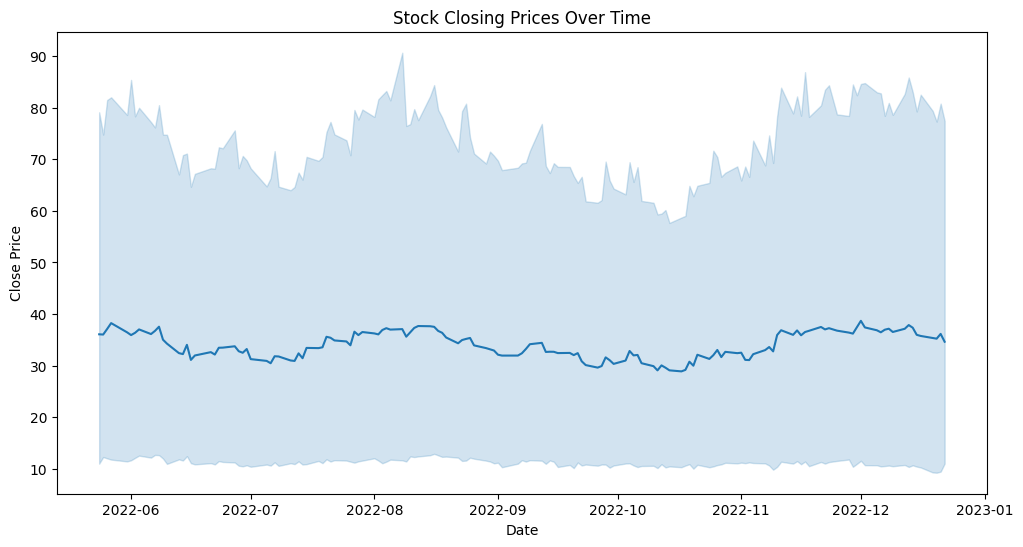

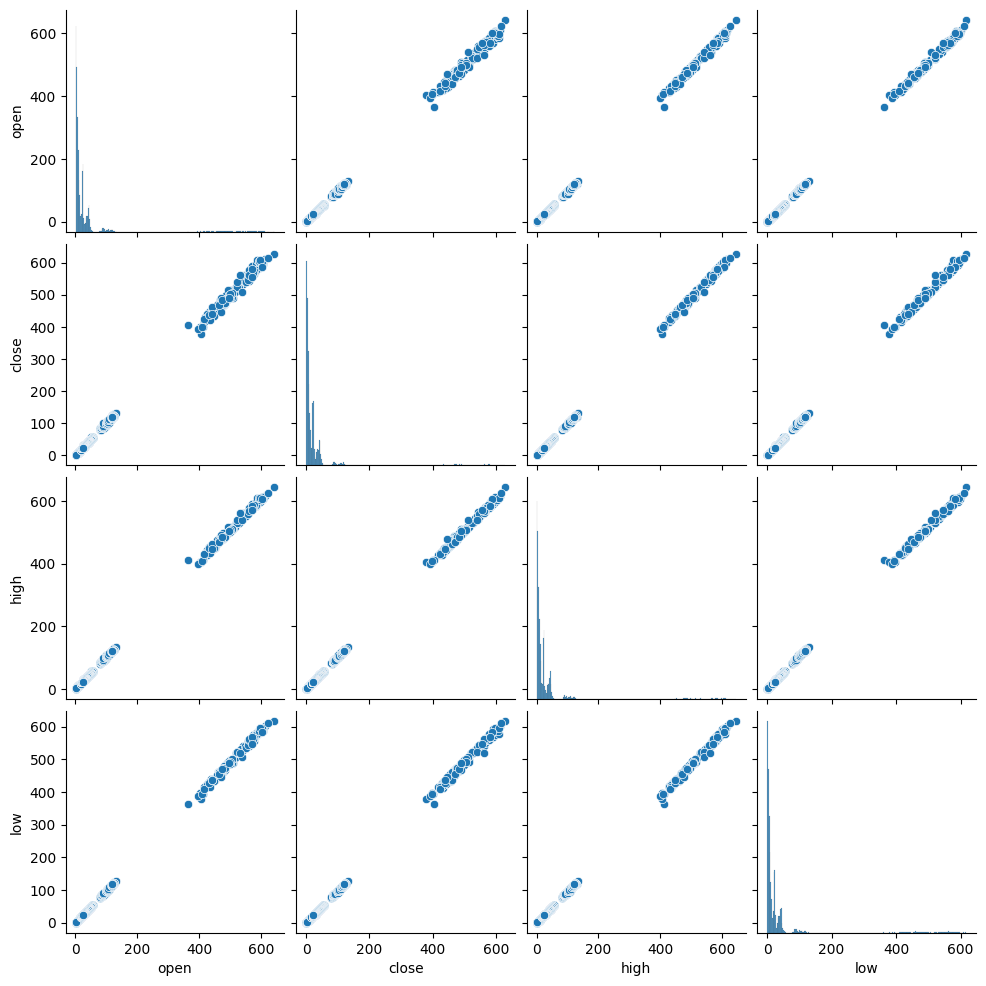

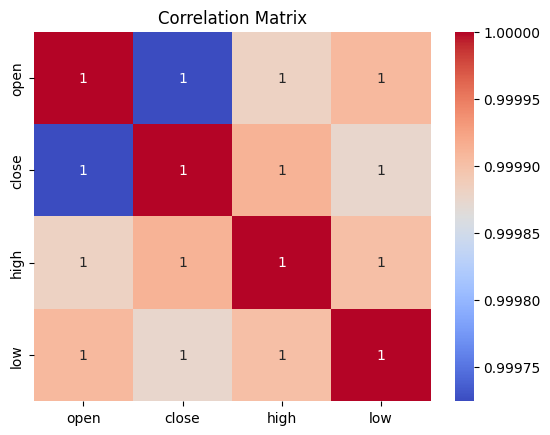

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot closing prices over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='date', y='close')
plt.title('Stock Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

# Plot distributions of open, close, high, low prices
sns.pairplot(df[['open', 'close', 'high', 'low']])
plt.show()

# Correlation matrix
correlation_matrix = df[['open', 'close', 'high', 'low']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Feature engineering


In [ ]:
# Create new features (e.g., moving averages)
df['SMA_7'] = df['close'].rolling(window=7).mean()
df['SMA_30'] = df['close'].rolling(window=30).mean()


Predictive modelling


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.impute import SimpleImputer

# Prepare features and target variable
features = ['open', 'high', 'low', 'SMA_7', 'SMA_30']
X = df[features]
y = df['close']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)
# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')

Mean Absolute Error: 0.29914253303141386
Mean Squared Error: 0.8123002156844386
